In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns



# Datos de clima

<AxesSubplot:xlabel='valor'>

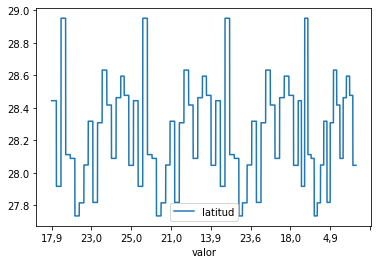

In [2]:
datosClimaDiarios = "../../../datos/CM05/datosClimaDiarios_.csv"
datosClimaDiarios_dt = pd.read_csv(datosClimaDiarios)
datosClimaDiarios_dt.plot(x='valor',y='latitud')

In [3]:
datosClimaDiarios_dt.head()

,indicador,estacion,nombre,provincia,latitud,longitud,anyo,mes,dia,valor,valorPrev,ultima_fecha
0,tmed,C249I,FUERTEVENTURA AEROPUERTO,LAS PALMAS,28.444722,-13.863056,2017,1,1,"17,9",NaN,20200910
1,tmin,C249I,FUERTEVENTURA AEROPUERTO,LAS PALMAS,28.444722,-13.863056,2017,1,1,"14,7",NaN,20200910
2,tmax,C249I,FUERTEVENTURA AEROPUERTO,LAS PALMAS,28.444722,-13.863056,2017,1,1,"21,1",NaN,20200910
3,prec,C249I,FUERTEVENTURA AEROPUERTO,LAS PALMAS,28.444722,-13.863056,2017,1,1,"0,0",NaN,20200910
4,velmedia,C249I,FUERTEVENTURA AEROPUERTO,LAS PALMAS,28.444722,-13.863056,2017,1,1,"8,1",NaN,20200910


In [4]:
print(datosClimaDiarios_dt.describe())

             latitud       longitud           anyo            mes  \
count  191192.000000  191192.000000  191192.000000  191192.000000   
mean       28.239203     -16.031765    2018.382903       6.194276   
std         0.317785       1.222138       1.074161       3.358432   
min        27.735833     -17.915278    2017.000000       1.000000   
25%        28.046944     -16.561111    2017.000000       3.000000   
50%        28.308889     -16.329444    2018.000000       6.000000   
75%        28.463333     -15.416111    2019.000000       9.000000   
max        28.951944     -13.600278    2020.000000      12.000000   

                 dia  ultima_fecha  
count  191192.000000      191192.0  
mean       15.643332    20200910.0  
std         8.817706           0.0  
min         1.000000    20200910.0  
25%         8.000000    20200910.0  
50%        16.000000    20200910.0  
75%        23.000000    20200910.0  
max        31.000000    20200910.0  


In [5]:
datosClimaDiarios_dt.dtypes

indicador        object
estacion         object
nombre           object
provincia        object
latitud         float64
longitud        float64
anyo              int64
mes               int64
dia               int64
valor            object
valorPrev        object
ultima_fecha      int64
dtype: object

In [6]:
datosClimaDiarios_dt = datosClimaDiarios_dt[datosClimaDiarios_dt.indicador != 'tmin']
datosClimaDiarios_dt = datosClimaDiarios_dt[datosClimaDiarios_dt.indicador != 'tmax']
datosClimaDiarios_dt = datosClimaDiarios_dt[datosClimaDiarios_dt.indicador != 'prec']
datosClimaDiarios_dt = datosClimaDiarios_dt[datosClimaDiarios_dt.indicador != 'sol']
datosClimaDiarios_dt = datosClimaDiarios_dt[datosClimaDiarios_dt.indicador != 'velmedia']
datosClimaDiarios_dt = datosClimaDiarios_dt[datosClimaDiarios_dt.indicador != 'presMax']
datosClimaDiarios_dt = datosClimaDiarios_dt[datosClimaDiarios_dt.indicador != 'presMin']

# Datos Aeropuertos

In [7]:
maestro_cm05_20150101_20151231 = "../../../datos/CM05/maestro_cm05_20150101_20151231.csv"
maestro_cm05_20150101_20151231_dt = pd.read_csv(maestro_cm05_20150101_20151231)
maestro_cm05_20150101_20151231_dt.head()

,indicador,estacion,nombre,provincia,latitud,longitud,anyo,mes,dia,valor
0,tmed,C249I,FUERTEVENTURA AEROPUERTO,LAS PALMAS,28.444722,-13.863056,2015,1,1,17.9
1,tmin,C249I,FUERTEVENTURA AEROPUERTO,LAS PALMAS,28.444722,-13.863056,2015,1,1,16.8
2,tmax,C249I,FUERTEVENTURA AEROPUERTO,LAS PALMAS,28.444722,-13.863056,2015,1,1,19.0
3,prec,C249I,FUERTEVENTURA AEROPUERTO,LAS PALMAS,28.444722,-13.863056,2015,1,1,0.0
4,velmedia,C249I,FUERTEVENTURA AEROPUERTO,LAS PALMAS,28.444722,-13.863056,2015,1,1,4.7


In [9]:
listAllAmountFiles = glob.glob('../../../datos/CM05/maestro_cm05_*.csv')
combined_amount_dt = pd.concat([pd.read_csv(f) for f in listAllAmountFiles ])
combined_amount_dt = combined_amount_dt[combined_amount_dt.indicador != 'tmin']
combined_amount_dt = combined_amount_dt[combined_amount_dt.indicador != 'tmax']
combined_amount_dt = combined_amount_dt[combined_amount_dt.indicador != 'prec']
combined_amount_dt = combined_amount_dt[combined_amount_dt.indicador != 'sol']
combined_amount_dt = combined_amount_dt[combined_amount_dt.indicador != 'velmedia']
combined_amount_dt = combined_amount_dt[combined_amount_dt.indicador != 'presMax']
combined_amount_dt = combined_amount_dt[combined_amount_dt.indicador != 'presMin']
combined_amount_dt = combined_amount_dt[combined_amount_dt.anyo != 2018]
combined_amount_dt = combined_amount_dt[combined_amount_dt.mes == 2]
#combined_amount_dt = combined_amount_dt[combined_amount_dt.index < 465]
combined_amount_dt = combined_amount_dt.iloc[:464]
#combined_amount_dt.drop(combined_amount_dt.index[240:])

print(combined_amount_dt.describe())

          latitud    longitud    anyo    mes        dia       valor
count  464.000000  464.000000   464.0  464.0  464.00000  407.000000
mean    28.244483  -15.999432  2021.0    2.0   14.31250   17.229238
std      0.326982    1.269459     0.0    0.0    8.06235    3.860346
min     27.735833  -17.915278  2021.0    2.0    1.00000   -3.300000
25%     28.049167  -16.548056  2021.0    2.0    7.00000   17.000000
50%     28.308889  -16.255278  2021.0    2.0   14.00000   18.300000
75%     28.463333  -15.416111  2021.0    2.0   21.00000   19.100000
max     28.951944  -13.600278  2021.0    2.0   28.00000   22.400000


In [10]:
combined_amount_dt.dtypes

indicador     object
estacion      object
nombre        object
provincia     object
latitud      float64
longitud     float64
anyo           int64
mes            int64
dia            int64
valor        float64
dtype: object

In [19]:
combined_amount_dt= combined_amount_dt.head(28)
combined_amount_dt

,indicador,estacion,nombre,provincia,latitud,longitud,anyo,mes,dia,valor
0,tmed,C249I,FUERTEVENTURA AEROPUERTO,LAS PALMAS,28.444722,-13.863056,2021,2,1,18.9
8,tmed,C249I,FUERTEVENTURA AEROPUERTO,LAS PALMAS,28.444722,-13.863056,2021,2,2,18.8
16,tmed,C249I,FUERTEVENTURA AEROPUERTO,LAS PALMAS,28.444722,-13.863056,2021,2,3,18.6
24,tmed,C249I,FUERTEVENTURA AEROPUERTO,LAS PALMAS,28.444722,-13.863056,2021,2,4,15.8
32,tmed,C249I,FUERTEVENTURA AEROPUERTO,LAS PALMAS,28.444722,-13.863056,2021,2,5,15.4
40,tmed,C249I,FUERTEVENTURA AEROPUERTO,LAS PALMAS,28.444722,-13.863056,2021,2,6,16.0
48,tmed,C249I,FUERTEVENTURA AEROPUERTO,LAS PALMAS,28.444722,-13.863056,2021,2,7,17.2
56,tmed,C249I,FUERTEVENTURA AEROPUERTO,LAS PALMAS,28.444722,-13.863056,2021,2,8,18.6
64,tmed,C249I,FUERTEVENTURA AEROPUERTO,LAS PALMAS,28.444722,-13.863056,2021,2,9,18.8
72,tmed,C249I,FUERTEVENTURA AEROPUERTO,LAS PALMAS,28.444722,-13.863056,2021,2,10,18.6


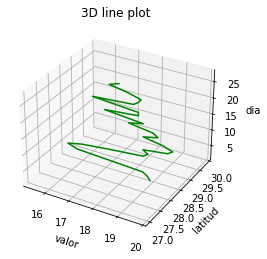

In [18]:
fig = plt.figure()
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
# defining all 3 axes
z = combined_amount_dt['dia']
x = combined_amount_dt['valor']
y = combined_amount_dt['latitud']
#ax.zlabel(None)
ax.set_xlabel('valor')
ax.set_zlabel('dia')
ax.set_ylabel('latitud')
# plotting
ax.plot3D(x, y, z, 'green')
ax.set_title('3D line plot')
plt.show()